# Simple and Stacked Autoencoder with MNIST - Dense

- fashion_mnist dataset 을 이용한 deep autoencoder 생성


- Mnist dataset 의 손글씨체를 encoding 후 decoding 하여 복원  

`plot_model` 사용을 위해서 `conda install pydot`, `conda install graphviz` 로 graphviz 와 pydot 설치

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
(X_train,_),(X_test,_) = fashion_mnist.load_data() ## _는 안쓴다는 뜻
X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

sample image 시각화

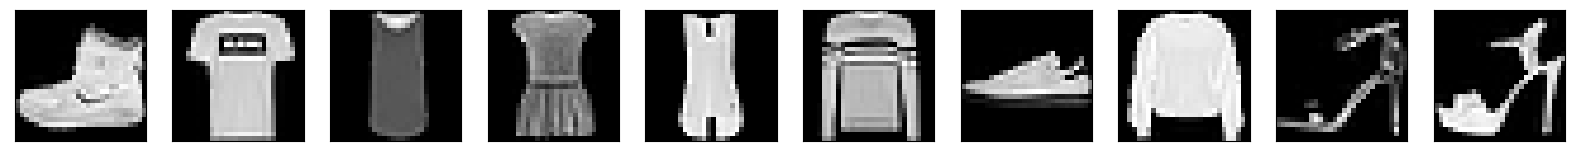

In [4]:
fig, ax = plt.subplots(1,10,figsize=(20,4))
for i in range(10):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

- data normalization  
- 2차원 image 를 1 차원으로 변경

In [6]:
X_train = X_train / 255. ## color값 정규화
X_test = X_test / 255.

# X_train = X_train.reshape(60000, 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# stacked autoencoder 작성

In [11]:
inp = Input(shape=(784,))

x = Dense(128, activation='relu')(inp)
x = Dense(64,activation='relu')(x)
encoder = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoder)
x = Dense(128, activation='relu')(x)
decoder = Dense(784, activation='sigmoid')(x)

# encoder + decoder 연결
encoder_model = Model(inputs=inp, outputs=encoder)
autoencoder = Model(inputs=inp, outputs=decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [12]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 784)               1011

In [13]:
history = autoencoder.fit(X_train, X_train, epochs=50, shuffle=True,
                          batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.3862 - val_loss: 0.3240
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3132 - val_loss: 0.3087
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3028 - val_loss: 0.3015
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2974 - val_loss: 0.2977
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2942 - val_loss: 0.2953
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2920 - val_loss: 0.2934
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2902 - val_loss: 0.2914
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2886 - val_loss: 0.2899
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2873 - val_loss: 0.2887
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2861 - val_loss: 0.2883

- model summary 및 시각화

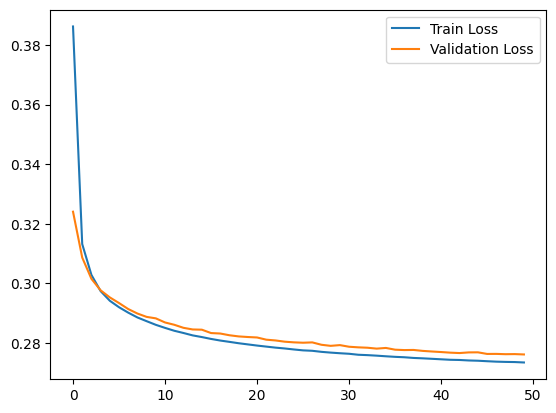

In [14]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

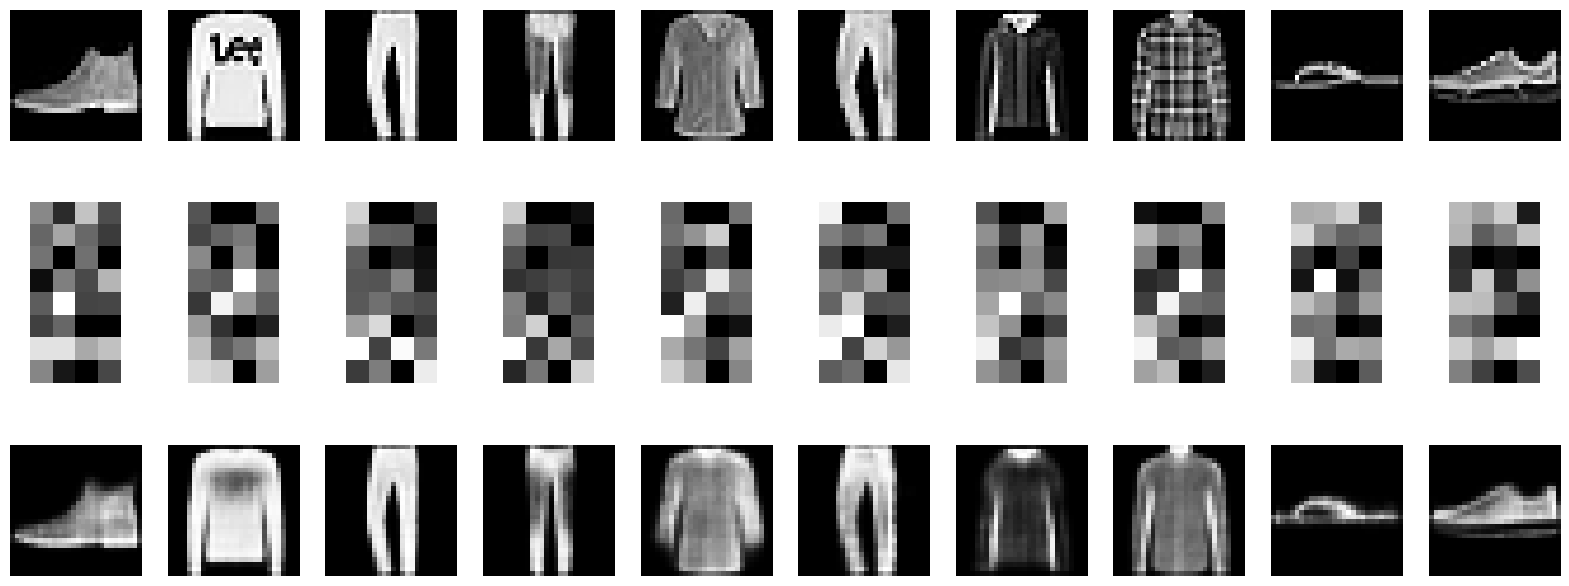

In [18]:
fig,ax = plt.subplots(3,10,figsize=(20,8))

for i in range(10):
    ax[0,i].imshow(X_test[i].reshape(28,28), cmap='gray') ## X_test.shape --> (10000,784), 시각화 위해 (28,28)
    
    img = np.expand_dims(X_test[i],axis=0)
    result = encoder_model.predict(img, verbose=0)
    ax[1,i].imshow(result.reshape(8,4), cmap='gray')
    
    result = autoencoder.predict(img, verbose=0)
    ax[2,i].imshow(result.reshape(28,28),cmap='gray')
    
    ax[0,i].axis('off')
    ax[1,i].axis('off')
    ax[2,i].axis('off')